###Data cleaning is a critically important step in any machine learning project. In tabular data, there are many dierent statistical analysis and data visualization techniques you can use to explore your data in order to identify data cleaning operations you may want to perform. Before jumping to the sophisticated methods, there are some very basic data cleaning operations that you probably should perform on every single machine learning project.

###After completing this section, you will know:


*   **How to identify and remove column variables that only have a single value.**
*   **How to identify and consider column variables with very few unique values.**
*   **How to identify and remove rows that contain duplicate observations.**



https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv

###The dataset involves the task of predicting whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean, given a vector that describes the contents of a patch of a satellite image. There are 937 cases. Each case is comprised of 48 numerical computer vision derived features, a patch number, and a class label. The normal case is no oil spill assigned the class label of 0, whereas an oil spill is indicated by a class label of 1. There are 896 cases for no oil spill and 41 cases of an oil spill.

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv

--2021-08-12 11:43:22--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230924 (226K) [text/plain]
Saving to: ‘oil-spill.csv.2’

oil-spill.csv.2     100%[===================>] 225.51K  --.-KB/s    in 0.02s   

2021-08-12 11:43:22 (13.3 MB/s) - ‘oil-spill.csv.2’ saved [230924/230924]



In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv",header=None)

In [3]:
data.shape

(937, 50)

In [4]:
import pandas as pd
data = pd.read_csv("/content/oil-spill.csv",header=None)
data.shape

(937, 50)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


###This dataset contains columns with very few unique values that provides a good basis for data cleaning.

In [6]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

--2021-08-12 11:43:27--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-08-12 11:43:27 (72.3 MB/s) - ‘iris.csv’ saved [4549/4549]



###iris flowers dataset is another standard machine learning dataset. The dataset involves predicting the flower species given measurements of iris owers in centimeters. It is a multiclass classification problem.

###This dataset contains duplicate rows that provides a good basis for data cleaning.

#**Identify Columns That Contain a Single Value**

In [7]:
data.shape, data.shape[0], data.shape[1]

((937, 50), 937, 50)

In [8]:
data[22].unique()

array([0])

In [9]:
import pandas as pd
data = pd.read_csv("/content/oil-spill.csv",header=None)
# summarize the number of unique values in each column
for i in range(data.shape[1]):
  print(i, len(data[i].unique()))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [10]:
print(data.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [11]:
counts = data.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]

In [12]:
# to_del=[]
# for i,v in enumerate(counts):
#   if(v==1):
#     to_del.append(i)


In [13]:
print(to_del)

[22]


In [14]:
data.drop(to_del, axis=1, inplace=True)
print(data.shape)

(937, 49)


#**Homework: **
#Task: Remove all the columns with unique values are <=1%

###**Remove Columns That Have A Low Variance**

In [15]:
from sklearn.feature_selection import VarianceThreshold
# load the dataset
data = pd.read_csv("/content/oil-spill.csv",header=None)
# split data into inputs and outputs
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


In [16]:
import numpy as np
thresholds = np.arange(0.0, 0.55, 0.05)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [17]:
from sklearn.feature_selection import VarianceThreshold
# load the dataset
data = pd.read_csv("/content/oil-spill.csv",header=None)
# split data into inputs and outputs
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape, y.shape)
results = []
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('Threshold={}, Features={}'.format(t, n_features))
  # store the result
  results.append(n_features)

(937, 49) (937,)
Threshold=0.0, Features=48
Threshold=0.05, Features=37
Threshold=0.1, Features=36
Threshold=0.15000000000000002, Features=35
Threshold=0.2, Features=35
Threshold=0.25, Features=35
Threshold=0.30000000000000004, Features=35
Threshold=0.35000000000000003, Features=35
Threshold=0.4, Features=35
Threshold=0.45, Features=33
Threshold=0.5, Features=31


##**Delete Rows That Contain Duplicate Data**

###If your dataset simply has duplicate rows, there is no need to worry about preserving the data; it is already a part of the finished dataset and you can merely remove or drop these rows from your cleaned data.

In [18]:
import pandas as pd

df = pd.read_csv('/content/iris.csv', header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


#**Outlier Identification and Removal**

###When modeling, it is important to clean the data sample to ensure that the observations best represent the problem. Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

In [19]:
columns = list(df.columns)

In [20]:
columns.pop()
columns

[0, 1, 2, 3]

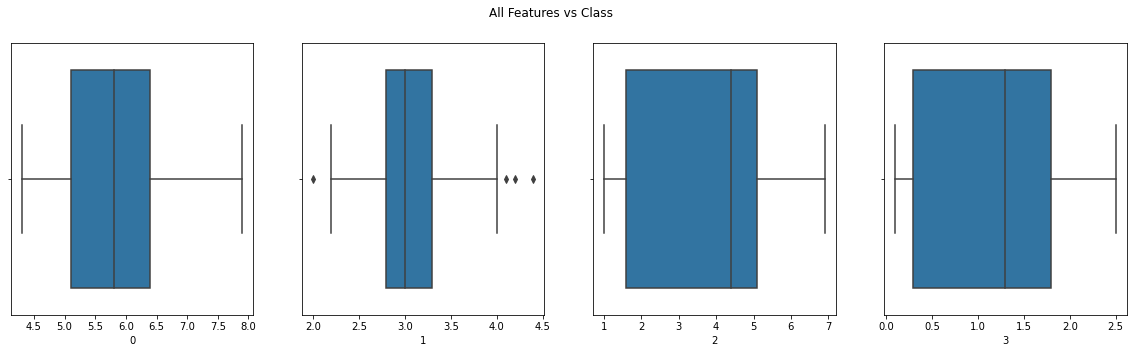

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("All Features vs Class")

for index, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=ax[index])

plt.show()

In [22]:
data_mean, data_std = df[1].mean(), df[1].std()
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print("lower = {} and upper = {}".format(lower,upper))


lower = 1.7447561925148656 and upper = 4.366808433335477


In [23]:
df.shape

(147, 5)

In [24]:
new_df = df[df[1] < upper]
new_df.shape

(146, 5)

In [25]:
new_df = new_df[new_df[1] > lower]
new_df.shape

(146, 5)

#**Handling Missing Values**

###Real-world data often has missing values. Data can have missing values for a number of reasons such as observations that were not recorded and data corruption. Handling missing data is important as many machine learning algorithms do not support data with missing values.

###**Dataset Used :** Most popular one - Diabetes dataset

In [26]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

--2021-08-12 11:43:50--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2021-08-12 11:43:50 (18.7 MB/s) - ‘pima-indians-diabetes.csv’ saved [23278/23278]



In [27]:
# load and summarize the dataset
import pandas as pd
# load the dataset
dataset = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)
# summarize the dataset
print(dataset.describe())

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [28]:
dataset.shape

(768, 9)

In [29]:
dataset.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [30]:
# count the number of missing values for each column
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [31]:
import numpy as np
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

In [32]:
dataset.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [33]:
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [34]:
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values


In [35]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

#**Missing Values Cause Problems**

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

ValueError: ignored

###Many popular predictive models such as support vector machines, the glmnet, and neural networks, cannot tolerate any amount of missing values.

##**Remove Rows With Missing Values**
###The simplest strategy for handling missing data is to remove records that contain a missing value.

In [39]:
print(dataset.shape)

(768, 9)


In [40]:
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(392, 9)


In [41]:
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_preds = model.predict(X)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,  cohen_kappa_score, accuracy_score

In [45]:
print("Classification Report : \n",classification_report(y, y_preds))
print("Accuracy :", accuracy_score(y, y_preds) * 100)
print("Cohen Kappa :", cohen_kappa_score(y, y_preds))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       262
           1       0.75      0.55      0.63       130

    accuracy                           0.79       392
   macro avg       0.77      0.73      0.74       392
weighted avg       0.78      0.79      0.78       392

Accuracy : 78.8265306122449
Cohen Kappa : 0.4876220472440945


###Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.

#**Statistical Imputation**

###A dataset may have missing values. These are rows of data where one or more values or columns in that row are not present. The values may be missing completely or they may be marked with a special character or value, such as a question mark (\?").

###Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

###Most machine learning algorithms require numeric input values, and a value to be present for each row and column in a dataset. As such, missing values can cause problems for machine learning algorithms. Because of this, it is common to identify missing values in a dataset and replace them with a numeric value. This is called data imputing, or missing data imputation.

###A simple and popular approach to data imputation involves using statistical methods to estimate a value for a column from those values that are present, then replace all missing values in the column with the calculated statistic.



*   The column mean value.
*   The column median value.
*   The column mode value.
*   A constant value.



In [46]:
# load and summarize the dataset
import pandas as pd
# load the dataset
dataset = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)

In [47]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [48]:
import numpy as np
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

In [49]:
dataset.shape

(768, 9)

In [50]:
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [52]:
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
#print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

In [53]:
print(pd.DataFrame(Xtrans).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [54]:
pd.DataFrame(Xtrans).shape

(768, 8)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrans,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_preds = model.predict(Xtrans)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix,  cohen_kappa_score, accuracy_score

In [58]:
print("Classification Report : \n",classification_report(y, y_preds))
print("Accuracy :", accuracy_score(y, y_preds) * 100)
print("Cohen Kappa :", cohen_kappa_score(y, y_preds))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.57      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.73      0.75       768
weighted avg       0.78      0.78      0.77       768

Accuracy : 78.25520833333334
Cohen Kappa : 0.49475276543443325


#**Homework**:
###strategies = ['mean', 'median', 'most_frequent', 'constant']

#**Use KNN Imputation**

###Datasets may have missing values, and this can cause problems for many machine learning algorithms. As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short. A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of dierent models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally eective, often referred to as nearest neighbor imputation. In this tutorial, you will discover how to use nearest neighbor imputation strategies for missing data in machine learning.

###Missing values must be marked with NaN values and can be replaced with nearest neighbor estimated values.

###If input variables are numeric, then regression models can be used for prediction, and this case is quite common. A range of dierent models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in experiments. The use of a KNN model to predict or fill missing values is referred to as Nearest Neighbor Imputation or KNN imputation.

In [59]:
# load and summarize the dataset
import pandas as pd
# load the dataset
dataset = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)

In [60]:
import numpy as np
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

In [61]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

###The KNNImputer is a data transform that is first configured based on the method used to estimate the missing values. The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the metric argument. The number of neighbors is set to five by default and can be configured by the n neighbors argument.<br/><br/>
###Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the weights argument.

In [62]:
from sklearn.impute import KNNImputer

In [63]:
imputer = KNNImputer()

In [64]:
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [65]:
print(pd.DataFrame(Xtrans).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrans,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_preds = model.predict(Xtrans)

In [68]:
print("Classification Report : \n",classification_report(y, y_preds))
print("Accuracy :", accuracy_score(y, y_preds) * 100)
print("Cohen Kappa :", cohen_kappa_score(y, y_preds))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       500
           1       0.71      0.58      0.64       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.73       768
weighted avg       0.76      0.77      0.76       768

Accuracy : 76.953125
Cohen Kappa : 0.4712636524877867


#**Homework :** Repeat above things on below given dataset

https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv

#**HOT-DECK**

###This is where a missing value is imputed from a randomly selected similar record. A form of hot-deck imputation is Last Observation Carried Forward (LOCF imputation). What LOCF does is it finds the first missing value then imputes the missing value using the cell value that is immediately prior.

In [69]:
# load and summarize the dataset
import pandas as pd
# load the dataset
dataset = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)

In [70]:
import numpy as np
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

###Now we will perform LOCF on this dataframe and this should impute all the missing values using the cell above the missing value

In [71]:
# looking at the data after imputation
dataset.fillna(method="ffill", inplace=True)

In [72]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [73]:
print(pd.DataFrame(X).isnull().sum())

0    0
1    0
2    0
3    0
4    3
5    0
6    0
7    0
dtype: int64


In [74]:
dataset.fillna(method="bfill", inplace=True)

In [75]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [76]:
print(pd.DataFrame(X).isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


#**Cold Deck Imputation:**
###This technique consists in replace the missing value for one constant from an external source, such as a value from a previous realization of the same survey. This technique is similar to substitution, but in this case, a constant value is used and in the substitution technique different values can be used to substitute the missing values.

#**Homework:**